In [1]:
import matplotlib.pyplot as plt
import numpy as np
from jupyterthemes import jtplot
jtplot.style(theme='monokai',context='notebook', ticks=True, grid=False)
%matplotlib inline

In [2]:
from PIL import Image

In [ ]:
img = Image.open('Downloads/rgb.jpg')

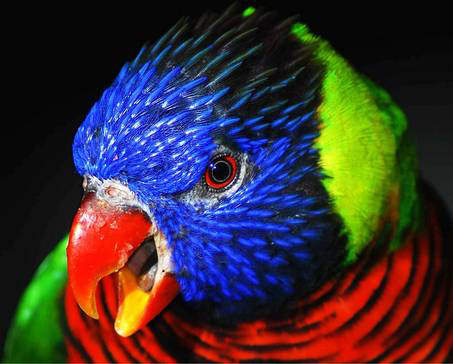

In [5]:
img

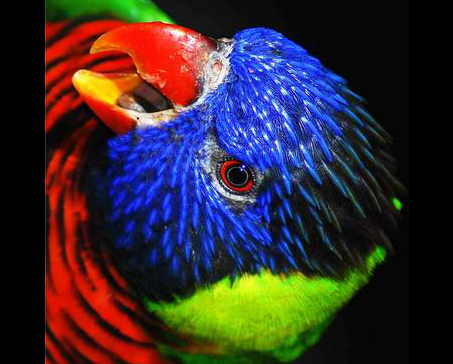

In [6]:
img.rotate(-90)

In [7]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [8]:
img_arr = np.asarray(img)

In [9]:
type(img_arr)

numpy.ndarray

## Height, width and channels

In [10]:
img_arr.shape

(364, 453, 3)

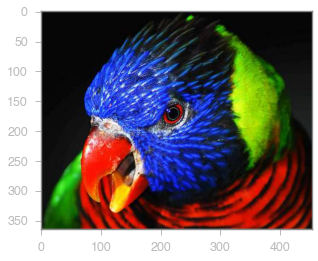

In [11]:
plt.imshow(img_arr)

## Red 

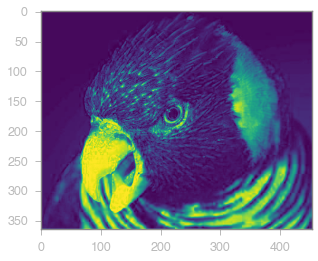

In [12]:
plt.imshow(img_arr[:,:,0])

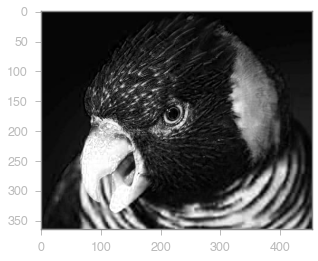

In [13]:
# red converted to gray
plt.imshow(img_arr[:,:,0], cmap ='gray')

## Green Scale

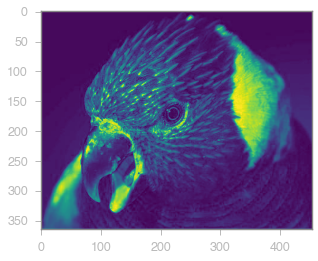

In [14]:
plt.imshow(img_arr[:,:,1])

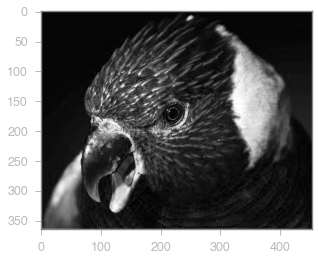

In [15]:
plt.imshow(img_arr[:,:,1], cmap = 'gray')

## Blue

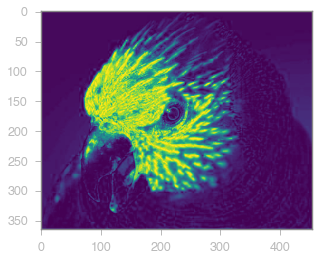

In [16]:
plt.imshow(img_arr[:,:,2])

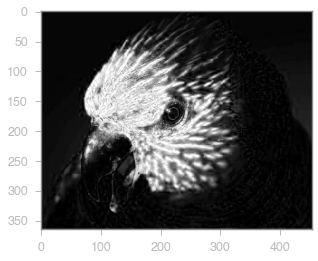

In [17]:
plt.imshow(img_arr[:,:,2], cmap = 'gray')

In [18]:
copy1 = img_arr.copy()
copy2 = img_arr.copy()
copy3 = img_arr.copy()

## Remove red

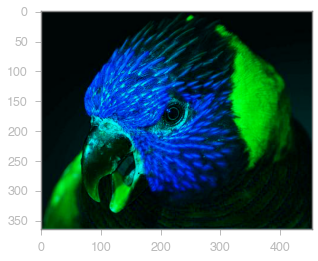

In [19]:
copy1[:,:,0] = 0
plt.imshow(copy1)

## Remove green


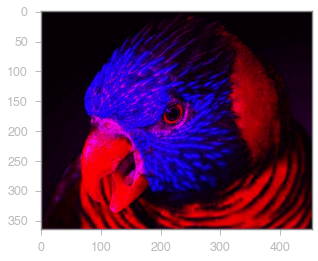

In [20]:
copy2[:,:,1] = 0
plt.imshow(copy2)

## Remove blue

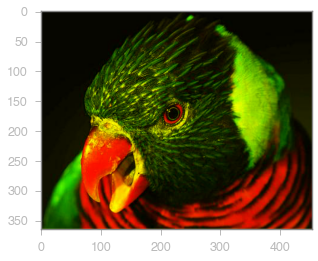

In [21]:
copy3[:,:,2] = 0
plt.imshow(copy3)

In [3]:
import cv2

In [ ]:
img2 = cv2.imread('Downloads/rgb.jpg') #returns BGR array

In [24]:
type(img2)

numpy.ndarray

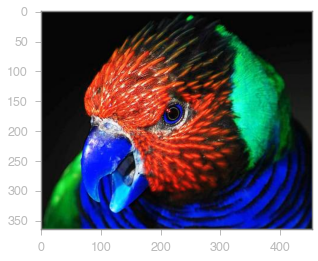

In [25]:
plt.imshow(img2)

In [26]:
img2.shape

(364, 453, 3)

In [6]:
img_fix = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

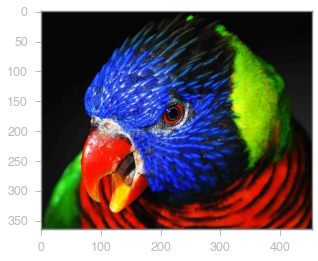

In [7]:
plt.imshow(img_fix)

In [29]:
img_gray = cv2.imread('Downloads/rgb.jpg', cv2.IMREAD_GRAYSCALE)

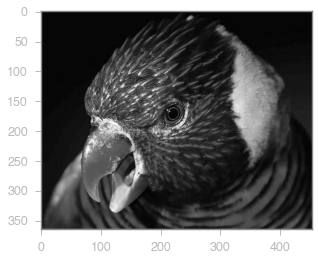

In [30]:
plt.imshow(img_gray, cmap ='gray')

In [31]:
img_gray.shape

(364, 453)

## Resize the image

In [32]:
img_new = cv2.resize(img_fix,(1000,364))

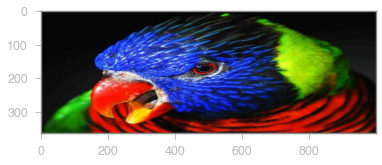

In [33]:
plt.imshow(img_new)

## Resize with ratio

In [34]:
width_ratio = 0.5
height_ratio = 0.5

In [35]:
img2 = cv2.resize(img_fix,(0,0),img_fix,width_ratio,height_ratio)

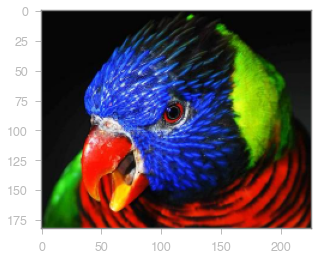

In [36]:
plt.imshow(img2)

In [37]:
img2.shape

(182, 226, 3)

## Flip on Horizontal Axis

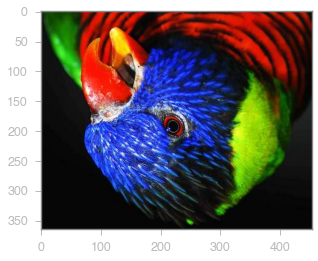

In [38]:
img_3 = cv2.flip(img_fix,0)
plt.imshow(img_3)

## Flip on Vertical Axis

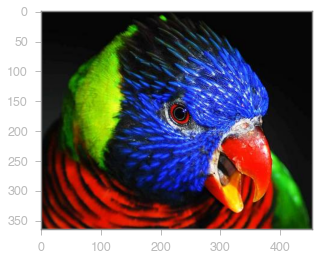

In [39]:
img_4 = cv2.flip(img_fix,1)
plt.imshow(img_4)

## Flip on horizontal & vertical axis

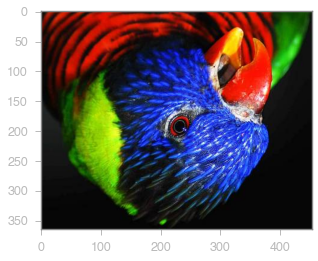

In [40]:
img_5 = cv2.flip(img_fix,-1)
plt.imshow(img_5)

## Change the size of our canvas

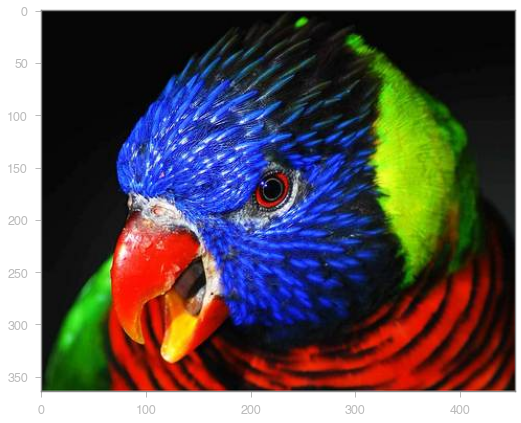

In [41]:
last_img = plt.figure(figsize = (10,7))
ilp = last_img.add_subplot(111)
ilp.imshow(img_fix)

## Create a black image 

In [42]:
black_img = np.zeros(shape=(512,512,3), dtype = np.int16)

In [43]:
black_img.shape

(512, 512, 3)

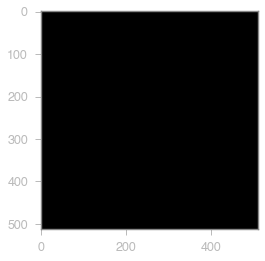

In [44]:
plt.imshow(black_img)

## Draw a circle

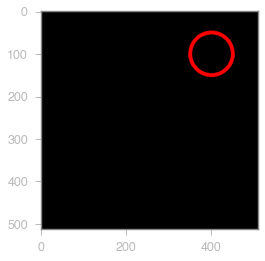

In [45]:
cv2.circle(img = black_img, center = (400,100), radius = 50, color = (255,0,0), thickness = 8)
plt.imshow(black_img)

### Filled circle

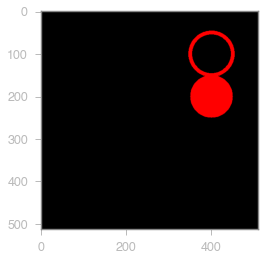

In [46]:
cv2.circle(img = black_img, center = (400,200), radius = 50, color = (255,0,0), thickness = -1)
plt.imshow(black_img)

## Draw a rectangle

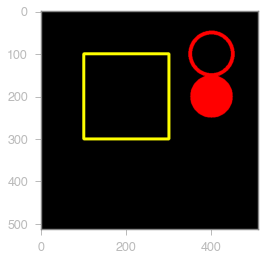

In [47]:
cv2.rectangle(black_img,pt1 = (100,100), pt2 = (300,300), color = (255,255,0), thickness = 5) # pt = (x,y)
plt.imshow(black_img)

## Draw  a triangle

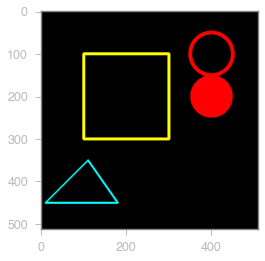

In [48]:
vertices = np.array([[10,450], [110,350],[180,450]], np.int32)
pts = vertices.reshape(-1,1,2)
cv2.polylines(black_img,[pts], isClosed = True, color = (0,255,255), thickness = 3)
plt.imshow(black_img)

 for fillied, thickness = -1

## Draw Line

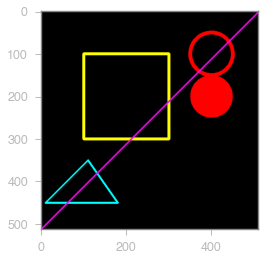

In [49]:
cv2.line(black_img,pt1 = (512,0), pt2 = (0,512), color = (255,0,255), thickness = 2)
plt.imshow(black_img)

## Write text

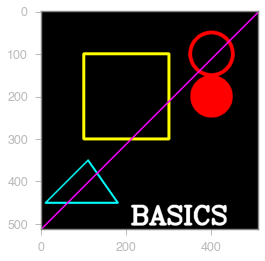

In [50]:
font = cv2.FONT_HERSHEY_COMPLEX

cv2.putText(black_img,text = 'BASICS', org = (210,500),fontFace = font, fontScale = 2, color = (255,255,255),thickness = 5, lineType = cv2.LINE_AA)

plt.imshow(black_img)

## Mouse events 

In [13]:
def custom_events(event, x, y, flags, param):
    print(x,y)
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(img,(x,y),70,(35,69,78),-1)
        points.append((x,y))
        if len(points) >= 2:
            cv2.line(img,points[-1],points[-2],(255,230,0),5)
        cv2.imshow('img',img)   
    if event == cv2.EVENT_RBUTTONDOWN:
        blue = img[y,x,0]
        green = img[y,x,1]
        red = img[y,x,2]
        strXY = str(red) + '-' + str(green) + '-' + str(blue)
        cv2.putText(img,strXY,(x,y),cv2.FONT_HERSHEY_COMPLEX,0.5,(255,255,0),2)
        cv2.imshow('img',img)
        
img = cv2.imread('Downloads/splash_bg.png')
points = []
cv2.imshow('img',img)
cv2.setMouseCallback('img',custom_events)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
def draw_circle_new(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(img,(x,y),70,(35,69,78),-1)
    elif event == cv2.EVENT_RBUTTONDOWN:
        cv2.circle(img,(x,y),50,(333,223,14),-1)
        
cv2.namedWindow(winname = 'my_circles')

cv2.setMouseCallback('my_circles',draw_circle_new)

img = np.zeros((512,512,3), np.int8)

while True:
    cv2.imshow('my_circles',img)
    if cv2.waitKey(5) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()

In [52]:
drawing = False
ex = -1
ey = -1


def draw_rectangle(event,x,y,flags,params):
    
    global ex,ey,drawing
    
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ex,ey = x,y
    
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            cv2.rectangle(img,(ex,ey),(x,y),(200,100,100),-1)
        
    
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        cv2.rectangle(img,(ex,ey),(x,y),(200,100,100),-1)
   

img = np.zeros((512,512,3), np.int8)

cv2.namedWindow(winname = 'my_rect')
cv2.setMouseCallback('my_rect',draw_rectangle)
while True:
    cv2.imshow('my_rect',img)
    if cv2.waitKey(5) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()

## Bind a trackbar

In [53]:
import numpy as np
import cv2 as cv

In [54]:
def nothing(x):
    print(x)

In [55]:
img = np.zeros((300,512,3), np.uint8)
cv.namedWindow('image')

In [30]:
cv.createTrackbar('B','image', 0, 255, nothing)
cv.createTrackbar('G','image', 0, 255, nothing)
cv.createTrackbar('R','image', 0, 255, nothing)

In [31]:
switch = '0 : Off \n 1 : On \n 2 : Gray'
cv.createTrackbar(switch, 'image', 0, 2, nothing)

In [ ]:
while(1):
    cv.imshow('image', img)
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break
    b = cv.getTrackbarPos('B', 'image')
    g = cv.getTrackbarPos('G', 'image')
    r = cv.getTrackbarPos('R', 'image')
    s = cv.getTrackbarPos(switch, 'image')

    if s == 0:
        img[:] = 0 
    elif s == 1:
        img[:] = [b,g,r]
    else:
        img[:] =  [0.1140*b + 0.5870*g + 0.2989*r] 
cv.destroyAllWindows()

1
2
4
6
11
16
20
21
24
27
31
36
40
42
45
50
56
62
69
72
75
77
78
77
1
5
10
17
23
29
37
46
56
65
73
83
90
99
111
120
123
126
127
128
127
1
6
11
20
25
27
28
30
32
33
34
35
1
2
78
81
89
100
104
110
115
117
124
127
129
131
134
136
138
140
141
143
145
147
148
152
155
159
161
164
165
167
168
170
172
174
176
178
180
181
183
185
186
188
189
191
193
197
199
202
203
205
208
211
212
213
215
217
218
219
221
222
223
224
225
226
227
228
229
231
232
234
235
236
238
239
240
241
242
244
245
246
248
250
251
252
253
255
128
129
131
133
141
152
159
166
191
202
212
217
219
226
227
234
236
238
240
242
243
244
245
246
248
250
251
252
253
254
36
37
41
47
57
63
71
78
81
91
98
103
109
116
121
127
133
139
144
150
156
162
167
171
177
183
187
191
195
198
206
209
212
215
217
220
221
223
226
227
229
230
232
234
235
236
237
238
239
240
242
244
245
246
247
248
249
250
249
245
236
222
212
195
181
164
145
125
104
83
74
56
42
36
25
17
11
5
0
252
250
248
244
240
234
228
220
213
204
186
169
158
146
136
132
128
124
120
117


## Canny Edge Detector

In [4]:
import cv2

In [6]:
img = cv2.imread('Downloads/rgb.jpg', cv2.IMREAD_GRAYSCALE) # Y' = 0.2989 R + 0.5870 G + 0.1140 B 

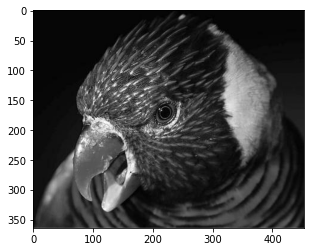

In [7]:
plt.imshow(img, cmap ='gray')

In [8]:
img.shape

(364, 453)

In [9]:
canny = cv2.Canny(img,100,200)

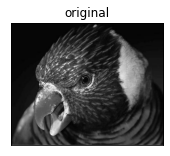

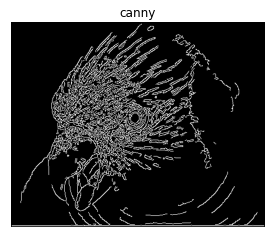

<Figure size 720x720 with 0 Axes>

In [22]:
images = [img, canny]
titles = ['original','canny']

for i in range(2):
    plt.subplot(1,2,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
    plt.figure(figsize = [10,10])

In [10]:
cv2.imwrite('canny.png', canny)

True

## Videos

In [28]:
cap = cv2.VideoCapture(0)
while(True):
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.imshow('frame',gray)
    print(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

1280.0
1280.0
1280.0
1280.0
1280.0
1280.0
1280.0
1280.0
1280.0
1280.0
1280.0
1280.0
1280.0
1280.0
1280.0
1280.0
1280.0
1280.0
1280.0
1280.0
1280.0
1280.0
1280.0
1280.0
1280.0
1280.0
1280.0
1280.0
1280.0
1280.0
1280.0
1280.0
1280.0
1280.0
1280.0
1280.0
1280.0
1280.0
1280.0
1280.0
1280.0
1280.0
1280.0
1280.0
1280.0
1280.0
1280.0


## Harris Corner Detector 

In [8]:
img = cv2.imread('Downloads/rgb.jpg') 

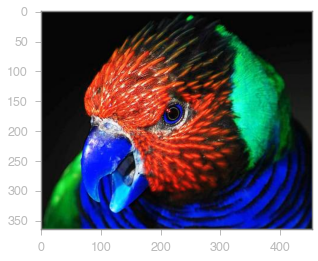

In [17]:
plt.imshow(img)


In [10]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [12]:
g = np.float32(gray) # required by cv2.cornerHarris

In [19]:
dist = cv2.cornerHarris(g, 4, 3, 0.04)  #(img, block_size, aperture parameter of Sobel derivative , k)

In [20]:
dist = cv2.dilate(dist, None)

In [21]:
img[dist > 0.01 * dist.max()] = [0,0,255]

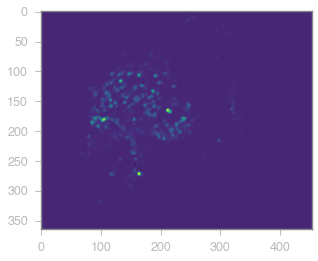

In [22]:
plt.imshow(dist)

## Shi Tomasi Corner Detector

In [26]:
img = cv2.imread('Downloads/rgb.jpg') 

In [27]:
corners = cv2.goodFeaturesToTrack(gray,25,0.01,10) # grayscaled img, N strongest corners, quality threshold, min. euclidian distance between two corners

In [28]:
corners = np.int0(corners)

In [35]:
for i in corners:
    x, y = i.ravel()
    cv2.circle(img,(x,y),3,-0,-1)

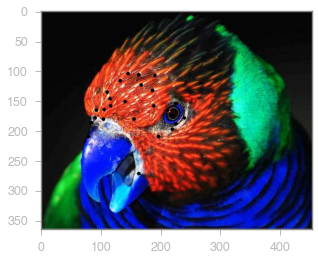

In [36]:
plt.imshow(img)

## Background Substraction 

Used to obtain a foreground mask. Application - count #visitors 

In [42]:
vid = cv2.VideoCapture(0)
fgbg = cv2.createBackgroundSubtractorMOG2(detectShadows=False)  # detectShadows
while(True):
    ret, frame = vid.read()
    fgbgmask = fgbg.apply(frame)
    cv2.imshow('frame', frame)
    cv2.imshow('fgbg frame',fgbgmask)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
vid.release()
cv2.destroyAllWindows()

### More on Cameras
<ul>
    <li>Functions like cv2.cvtColor can be applied on frame to display desired effects </li>
    <li>vid.isOpened()</li>
    <li>vid.get(cv2.CAP_PROP_FRAME_WIDTH)</li>
    <li>To save videos, first declare a VideoWriter object. 
        result = cv2.VideoWriter('filename.avi', 
                         cv2.VideoWriter_fourcc(*'MJPG'),
                         10, size). Then, result.write(frame). Make sure you release the object using result.release().
    </li>
    <li>Setting camera parameters : vid.set(3,__) for width, vid.set(4,__) for height.</li>
</ul>


## Show Date and Time on a video

In [43]:
import datetime
cap = cv2.VideoCapture(0)
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
        font = cv2.FONT_HERSHEY_COMPLEX
        dt = str(datetime.datetime.now())
        frame = cv2.putText(frame,dt,(10,50),font,1,(0,255,255),2,cv2.LINE_AA)
        cv2.imshow('frame',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

## Adding images 

In [55]:
img = cv2.imread('Downloads/dog-bg.jpg')
req_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
req_img = cv2.resize(req_img,(350,350))

In [59]:
img2 = cv2.imread('Downloads/rgb.jpg')
req_img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
req_img2 = cv2.resize(req_img2,(350,350))

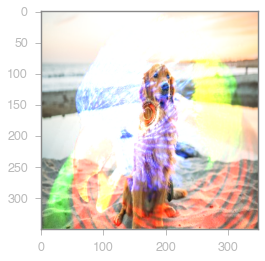

In [61]:
new = cv2.add(req_img,req_img2)
plt.imshow(new)

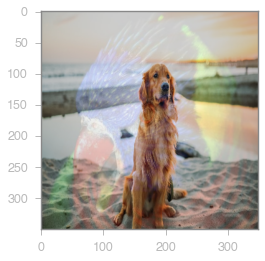

In [64]:
new2 = cv2.addWeighted(req_img,0.8,req_img2,0.2,0)
plt.imshow(new2)

## Object Detection and Object Tracking using HSV Color Space